In [1]:
pip install pillow

  Using cached Pillow-10.0.0-cp311-cp311-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2 
from PIL import Image, ImageOps, ImageFilter
import sys
from pathlib import Path
import torchvision.transforms as T

# 함수정의 
- 이미지 파일이 있는 폴더에서 이미지를 하나하나 가져와 필터를 적용하는 함수임수정의

In [ ]:
def save_filtered_images(directory, filter_func, output_directory):
    # 출력 디렉토리가 없는 경우 생성
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # 디렉토리 내의 파일들을 모두 가져옴
    files = os.listdir(directory)

    for file in files:
        # 파일의 확장자 확인
        _, extension = os.path.splitext(file)
        if extension.lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            image_path = os.path.join(directory, file)
            image = Image.open(image_path)
            filtered_image = filter_func(image)
            # 저장할 파일 경로와 이름 생성
            file_name = f"{filter_func.__name__}_{file}"  # 새로운 이름 설정
            output_path = os.path.join(output_directory, file_name)
            filtered_image.save(output_path)

# 원본 이미지 저장된 디렉토리 경로
directory_path_ori = r'C:\dev\github\.venv\03_final_pjt\.venv\preprocessing\data\cat_selected\\'
# 정규화 적용된 이미지가 저장될 디렉토리 경로
directory_path = r'C:\dev\github\.venv\03_final_pjt\.venv\preprocessing\data\cat_selected\\'
# 필터링 적용된 이미지를 저장할 디렉토리 경로
output_directory_path = r'C:\dev\github\.venv\03_final_pjt\.venv\preprocessing\data\cat_filtered\\'

# 함수실행
- 테스트후 원하는 필터링 선별하여 적용

In [ ]:
# 정규화
save_filtered_images(directory_path_ori, nor, directory_path)
# horizontal_flip
save_filtered_images(directory_path, flip, output_directory_path)
# rotation
save_filtered_images(directory_path, rotate_image, output_directory_path)
save_filtered_images(directory_path, rotate_image_60, output_directory_path)
save_filtered_images(directory_path, rotate_image_80, output_directory_path)
save_filtered_images(directory_path, rotate_image_270, output_directory_path)
# blurring
save_filtered_images(directory_path, blur_filter, output_directory_path)
save_filtered_images(directory_path, blur_kernal, output_directory_path)
save_filtered_images(directory_path, blur_gaussian, output_directory_path)
save_filtered_images(directory_path, smoothing, output_directory_path)
# edge
save_filtered_images(directory_path, edge_fineedge, output_directory_path)
save_filtered_images(directory_path, edge_smooth, output_directory_path)
save_filtered_images(directory_path, edge_enhance, output_directory_path)
save_filtered_images(directory_path, edge_gaussian, output_directory_path)
save_filtered_images(directory_path, edge_canny, output_directory_path)
# threshold
save_filtered_images(directory_path, adj_threshold, output_directory_path)
save_filtered_images(directory_path, adj_threshold_150, output_directory_path)
save_filtered_images(directory_path, threshold_equalized, output_directory_path)
save_filtered_images(directory_path, adaptiveThreshold_gaussian, output_directory_path)
save_filtered_images(directory_path, adaptiveThreshold_mean, output_directory_path)
# erosion, dilation
save_filtered_images(directory_path, erosion, output_directory_path)
save_filtered_images(directory_path, diilation, output_directory_path)
# prespective 
save_filtered_images(directory_path, perspective_10, output_directory_path)
save_filtered_images(directory_path, perspective_20, output_directory_path)
save_filtered_images(directory_path, perspective_30, output_directory_path)
save_filtered_images(directory_path, perspective_40, output_directory_path)
# contrast, brightness
save_filtered_images(directory_path, adjust_contrast, output_directory_path)
save_filtered_images(directory_path, brightness_50, output_directory_path)
save_filtered_images(directory_path, brightness_100, output_directory_path)

# 필터링

## 1_정규화

In [ ]:
def nor(image):
    # image = cv2.imread(image)
    image = np.array(image)
    # If the image is grayscale, normalize it directly
    if len(image.shape) == 2:
        min_val = np.min(image)
        max_val = np.max(image)
        normalized_image = ((image - min_val) / (max_val - min_val)) * 255
        normalized_image = normalized_image.astype(np.uint8)
    else:
        # For color images, normalize each color channel individually
        normalized_image = np.zeros_like(image)
        for i in range(image.shape[2]):
            min_val = np.min(image[:, :, i])
            max_val = np.max(image[:, :, i])
            normalized_image[:, :, i] = ((image[:, :, i] - min_val) / (max_val - min_val)) * 255
        normalized_image = normalized_image.astype(np.uint8)
        
    nor = Image.fromarray(normalized_image)
    return nor

# save_filtered_images(directory_path_ori, nor, directory_path)

## 2_brightness_contrast

In [ ]:
def brightness_50(image):
    enhancer = ImageEnhance.Brightness(image)
    brightness_50 = enhancer.enhance(1.5)
    return brightness_50

def brightness_100(image):
    enhancer = ImageEnhance.Brightness(image)
    brightness_100 = enhancer.enhance(2)
    return brightness_100

def adjust_contrast(image):
    enhancer = ImageEnhance.Contrast(image)
    adjust_contrast = enhancer.enhance(1.5)
    return adjust_contrast

# save_filtered_images(directory_path, brightness_50, output_directory_path)
# save_filtered_images(directory_path, brightness_100, output_directory_path)
# save_filtered_images(directory_path, adjust_contrast, output_directory_path)

## 3_perspective

In [ ]:
import torchvision.transforms as T

def perspective_10(image):
    perspective_transformer = T.RandomPerspective(distortion_scale=0.1, p=1.0)
    perspective_10 = perspective_transformer(image)
    return perspective_10

def perspective_20(image):
    perspective_transformer = T.RandomPerspective(distortion_scale=0.2, p=1.0)
    perspective_20 = perspective_transformer(image)
    return perspective_20

def perspective_30(image):
    perspective_transformer = T.RandomPerspective(distortion_scale=0.3, p=1.0)
    perspective_30 = perspective_transformer(image)
    return perspective_30

def perspective_40(image):
    perspective_transformer = T.RandomPerspective(distortion_scale=0.4, p=1.0)
    perspective_40 = perspective_transformer(image)
    return perspective_40

# save_filtered_images(directory_path, perspective_10, output_directory_path)
# save_filtered_images(directory_path, perspective_20, output_directory_path)
# save_filtered_images(directory_path, perspective_30, output_directory_path)
# save_filtered_images(directory_path, perspective_40, output_directory_path)

## 4_blurring

In [ ]:
def blur_filter(image):
    blur_filter = image.filter(ImageFilter.BLUR)
    return blur_filter

# blurring - Kernal size = 10
def blur_kernal(image):
    image_array = np.array(image)
    blur_kernel = cv2.blur(image_array, (10, 10))
    blur_kernel = Image.fromarray(blur_kernel)
    return blur_kernel

# blurring - blur_gaussian = 21
def blur_gaussian(image):
    image_array = np.array(image)
    blur_gaussian = cv2.medianBlur(image_array, 21)  ### 양의 홀수값만 사용가능
    blur_gaussian = Image.fromarray(blur_gaussian)
    return blur_gaussian

def smoothing(image):
    smoothing = image.filter(ImageFilter.SMOOTH)
    return smoothing

# save_filtered_images(directory_path, blur_filter, output_directory_path)
# save_filtered_images(directory_path, blur_kernal, output_directory_path)
# save_filtered_images(directory_path, blur_gaussian, output_directory_path)
# save_filtered_images(directory_path, smoothing, output_directory_path)

## 5_edge

In [ ]:
# edge - fineedge 
def edge_fineedge(image):
    image = np.array(image)
    image_gray = Image.fromarray(image).convert('L')
    edge_fineedge = image_gray.filter(ImageFilter.FIND_EDGES)
    return edge_fineedge

# edge - smooth 
def edge_smooth(image):
    image = np.array(image)
    image_gray = Image.fromarray(image).convert('L')
    edge_smooth = image_gray.filter(ImageFilter.SMOOTH)
    return edge_smooth

# edge - enhance
def edge_enhance(image):
    image = np.array(image)
    image_gray = Image.fromarray(image.astype('uint8')).convert('L')
    # image_gray = Image.fromarray(image).convert('L')
    edge_enhance = image_gray.filter(ImageFilter.EDGE_ENHANCE)
    return edge_enhance

# edge - gaussian
def edge_gaussian(image):
    image = np.array(image)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge_gaussian = cv2.GaussianBlur(image_gray, (5,5), 0)
    edge_gaussian = Image.fromarray(edge_gaussian)
    return edge_gaussian

# edge - canny
def edge_canny(image):
    image = np.array(image)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge_canny = cv2.Canny(image_gray, 50, 300)
    edge_canny = Image.fromarray(edge_canny)
    return edge_canny

# save_filtered_images(directory_path, edge_fineedge, output_directory_path)
# save_filtered_images(directory_path, edge_smooth, output_directory_path)
# save_filtered_images(directory_path, edge_enhance, output_directory_path)
# save_filtered_images(directory_path, edge_gaussian, output_directory_path)
# save_filtered_images(directory_path, edge_canny, output_directory_path)

## 6_threshold

In [ ]:
# adj_threshold = 100
def adj_threshold(image):
    image_gray = image.convert('L')
    threshold = 100
    adj_threshold = image_gray.point(lambda x: 255 if x > threshold else 0)
    return adj_threshold

def adj_threshold_150(image):
    image_gray = image.convert('L')
    threshold = 150
    adj_threshold_150 = image_gray.point(lambda x: 255 if x > threshold else 0)
    return adj_threshold_150

# thresholding - equalized
def threshold_equalized(image):
    image_gray = image.convert('L')
    threshold_value = 128
    image_thresholded = image_gray.point(lambda x: 255 if x >= threshold_value else 0)  # Thresholding
    image_filtered = image_thresholded.filter(ImageFilter.BLUR)  # Apply a blurring filter
    threshold_equalized = ImageOps.equalize(image_filtered)  # Apply histogram equalization
    return threshold_equalized

# thresholding - gaussian
def adaptiveThreshold_gaussian(image):
    image_gray = np.array(image.convert('L'))
    adaptiveThreshold_gaussian = cv2.adaptiveThreshold(image_gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptiveThreshold_gaussian = Image.fromarray(adaptiveThreshold_gaussian)
    return adaptiveThreshold_gaussian

# thresholding - mean
def adaptiveThreshold_mean(image):
    image_gray = np.array(image.convert('L'))
    adaptiveThreshold_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptiveThreshold_mean = Image.fromarray(adaptiveThreshold_mean)
    return adaptiveThreshold_mean

# save_filtered_images(directory_path, adj_threshold, output_directory_path)
# save_filtered_images(directory_path, adj_threshold_150, output_directory_path)
# save_filtered_images(directory_path, threshold_equalized, output_directory_path)
# save_filtered_images(directory_path, adaptiveThreshold_gaussian, output_directory_path)
# save_filtered_images(directory_path, adaptiveThreshold_mean, output_directory_path)

7_ erosion, dilation

In [ ]:
# Erosion
def erosion(image):
    image_gray = np.array(image.convert('L'))
    kernel = np.ones((3,3), np.uint8)
    erosion = cv2.erode(image_gray, kernel, iterations=1) # 반복횟수 iterations=1 (많이하면 뭉개짐)
    erosion = Image.fromarray(erosion)
    return erosion

# Dilation
def diilation(image):
    image_gray = np.array(image.convert('L'))
    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(image_gray, kernel, iterations=3)
    dilation = Image.fromarray(dilation)
    return dilation

# save_filtered_images(directory_path, erosion, output_directory_path)
# save_filtered_images(directory_path, diilation, output_directory_path)

## 8_flip

In [ ]:
def flip(image):
    image_np = np.array(image)
    flip = cv2.flip(image_np, flipCode=1)
    flip = Image.fromarray(flip)
    return flip

# save_filtered_images(directory_path, flip, output_directory_path)

## 9_rotation

In [ ]:
# Rotation : 각도 변경해서 사용가능
def rotate_image(image):
    rotated_image = image.rotate(45, expand=True)   ### 각도
    return rotated_image

def rotate_image_60(image):
    rotate_image_60 = image.rotate(60, expand=True)  
    return rotate_image_60

def rotate_image_80(image):
    rotate_image_80 = image.rotate(80, expand=True)  
    return rotate_image_80

def rotate_image_270(image):
    rotate_image_270 = image.rotate(270, expand=True)  
    return rotate_image_270

# save_filtered_images(directory_path, rotate_image, output_directory_path)
# save_filtered_images(directory_path, rotate_image_60, output_directory_path)
# save_filtered_images(directory_path, rotate_image_80, output_directory_path)
# save_filtered_images(directory_path, rotate_image_270, output_directory_path)

## 10_erosion, dilation
 - 반복횟수 iterations를 크게할수록 뭉개짐

In [ ]:
# Erosion
def erosion(image):
    image_gray = np.array(image.convert('L'))
    kernel = np.ones((3,3), np.uint8)
    erosion = cv2.erode(image_gray, kernel, iterations=1) # 반복횟수 iterations=1 (많이하면 뭉개짐)
    erosion = Image.fromarray(erosion)
    return erosion

# Dilation
def diilation(image):
    image_gray = np.array(image.convert('L'))
    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(image_gray, kernel, iterations=3)
    dilation = Image.fromarray(dilation)
    return dilation

# save_filtered_images(directory_path, erosion, output_directory_path)
# save_filtered_images(directory_path, diilation, output_directory_path)

# 필터링 테스트(예시)

## 샘플이미지 경로지정 

In [56]:
# 샘플이미지 패스 지정
image_path = r'C:\dev\github\.venv\03_final_pjt\.venv\preprocessing\data\v3\\'
image = cv2.imread(image_path + '38670_39001_2746.jpg')
image_pil = Image.fromarray(np.uint8(image))
image_gray = image_pil.convert("L")

## horizontal_flip

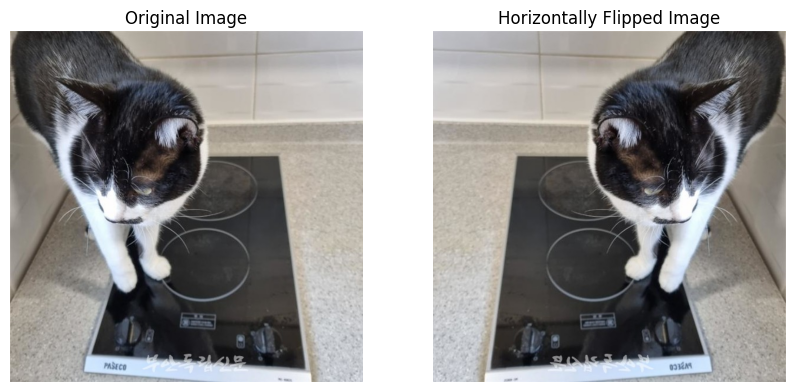

In [41]:
# image = cv2.imread(image)
flipped_image = cv2.flip(image, flipCode=1)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Horizontally Flipped Image')
axs[1].axis('off')
plt.show()

## contrast

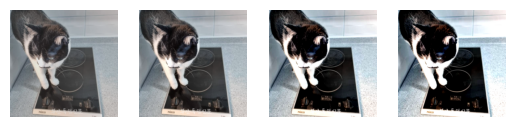

In [21]:
from PIL import Image, ImageEnhance

def adjust_contrast(image, factor):
    image = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(image)
    adjusted_image = enhancer.enhance(factor)
    return np.array(adjusted_image)

contrast_factors = [0.8, 1, 1.5, 1.8]
adjusted_contrast_images = [adjust_contrast(image, factor) for factor in contrast_factors]

fig, axs = plt.subplots(1, len(adjusted_contrast_images))
for i, image in enumerate(adjusted_contrast_images):
    axs[i].imshow(image)
    axs[i].axis('off')
plt.show()

## brightness

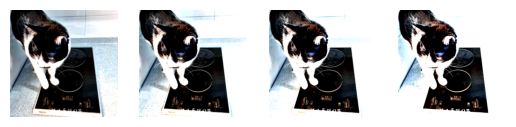

In [22]:
def adjust_brightness(image, factor):
    image = Image.fromarray(image)
    enhancer = ImageEnhance.Brightness(image)
    adjusted_image = enhancer.enhance(factor)
    return np.array(adjusted_image)

brightness_factors = [1, 1.3, 1.5, 2]
brightened_images = [adjust_brightness(image, factor) for factor in brightness_factors]

# Display the brightened images
fig, axs = plt.subplots(1, len(brightened_images))
for i, img in enumerate(brightened_images):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

## perspective

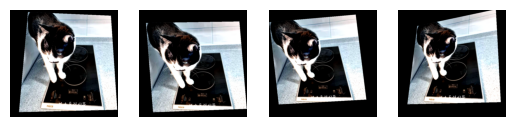

In [24]:
import torchvision.transforms as T

image = Image.fromarray(np.uint8(image))
perspective_transformer = T.RandomPerspective(distortion_scale=0.4, p=1.0)
perspective = [perspective_transformer(image) for _ in range(4)]
# perspective = perspective_transformer(image_pil)
fig, axs = plt.subplots(1, len(perspective))
for i, img in enumerate(perspective):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

## horizontal_flip 

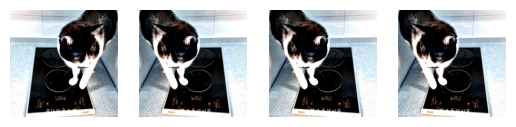

In [25]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(image) for _ in range(4)]

fig, axs = plt.subplots(1, len(transformed_imgs))
for i, img in enumerate(transformed_imgs):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

## rotation

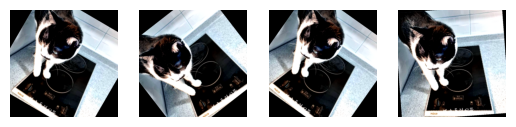

In [26]:
rotation_transformer = T.RandomRotation(degrees=45)  
transformed_imgs = [rotation_transformer(image) for _ in range(4)]

# Display the transformed images
fig, axs = plt.subplots(1, len(transformed_imgs))
for i, img in enumerate(transformed_imgs):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

## blurring

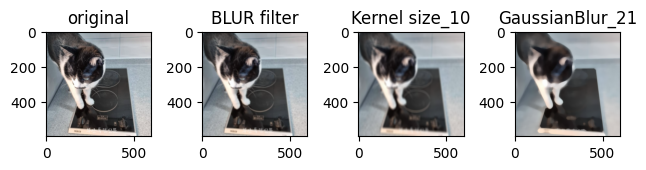

In [49]:
blur_img = image_pil.filter(ImageFilter.BLUR)
img_blur = cv2.blur(image, (10, 15))  # 숫자가 클수록 blurry 해짐
img_blur1 = cv2.blur(image, (20, 20))
img_blur_g = cv2.medianBlur(image, 21)

fig, axs = plt.subplots(1, 4)
axs[0].imshow(image)
axs[0].set_title('original')

axs[1].imshow(blur_img)
axs[1].set_title('BLUR filter')

axs[2].imshow(img_blur)
axs[2].set_title('Kernel size_10')

# Display the blue channel image
axs[3].imshow(img_blur_g)
axs[3].set_title('GaussianBlur_21')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


### smoothing

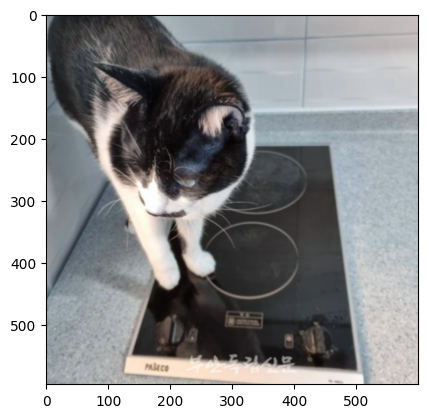

In [51]:
smooth_img = image_pil.filter(ImageFilter.SMOOTH)
plt.imshow(smooth_img)

### edge detection 

Text(0.5, 1.0, 'Basic')

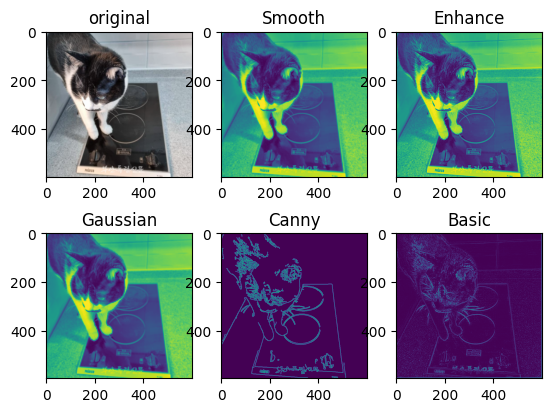

In [64]:
fig, axs = plt.subplots(2, 3)

edges = img_gray.filter(ImageFilter.FIND_EDGES)

image_gray_re = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edge1 = cv2.Canny(image_gray_re, 50, 300)

img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)

edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
image_gray_blur = cv2.GaussianBlur(image_gray_re, (5, 5), 0) 

axs[0,0].imshow(image)
axs[0,0].set_title('original')

axs[0,1].imshow(img_gray_smooth)
axs[0,1].set_title('Smooth')

axs[0,2].imshow(edge_enhance)
axs[0,2].set_title('Enhance')

axs[1,0].imshow(image_gray_blur)
axs[1,0].set_title('Gaussian')

axs[1,1].imshow(image_edge1)
axs[1,1].set_title('Canny')

axs[1,2].imshow(edges)
axs[1,2].set_title('Basic')

## Thresholding

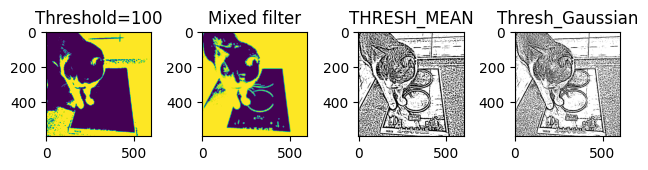

In [70]:
# img_cat_threshold
threshold = 150   ### 임계값(조정)
img_cat_threshold = img_gray.point(lambda x: 255 if x > threshold else 0)
# image_equalized
image_adjusted = img_gray.point(lambda x: x * 1.2)  # Increase brightness by 20%
threshold_value = 128
image_thresholded = image_adjusted.point(lambda x: 255 if x >= threshold_value else 0)  # Thresholding
image_filtered = image_thresholded.filter(ImageFilter.BLUR)  # Apply a blurring filter
image_equalized = ImageOps.equalize(image_filtered)
# THRESH_MEAN
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_thr1 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Thresh_Gaussian
image_thr2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

fig, axs = plt.subplots(1, 4)
axs[0].imshow(img_cat_threshold)
axs[0].set_title('Threshold=100')

axs[1].imshow(image_equalized)
axs[1].set_title('Mixed filter')

axs[2].imshow(image_thr1, cmap='gray')
axs[2].set_title('THRESH_MEAN')

axs[3].imshow(image_thr2, cmap='gray')
axs[3].set_title('Thresh_Gaussian')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

### Erosion, Dilation
- 이미지 침식, 팽창
- 값이 커질수록 erosion은 어두워지고, dilation은 밝아짐

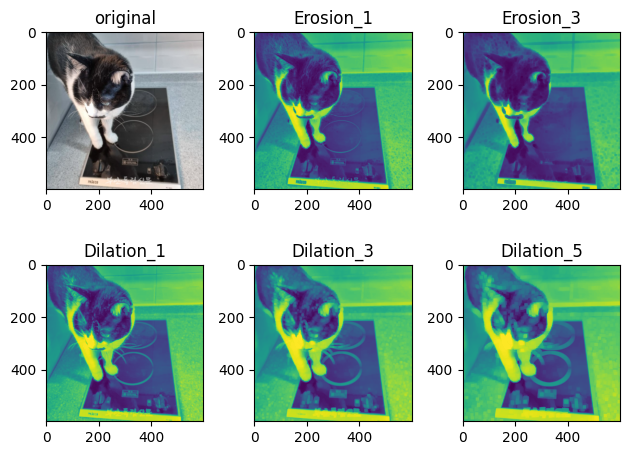

In [75]:
# Erosion_1
kernel = np.ones((3,3), np.uint8) # 커널이 돌면서 픽셀연산하면서 경계 조정해줌
image_erosion = cv2.erode(image_gray, kernel, iterations=1) # 반복횟수 iterations=1 (많이하면 뭉개짐)
image_erosion_1 = cv2.erode(image_gray, kernel, iterations=3)
# Dilation
image_dilate = cv2.dilate(image_gray, kernel, iterations=1)
image_dilate_1 = cv2.dilate(image_gray, kernel, iterations=3)
image_dilate_2 = cv2.dilate(image_gray, kernel, iterations=5)

fig, axs = plt.subplots(2, 3)
axs[0,0].imshow(image)
axs[0,0].set_title('original')

axs[0,1].imshow(image_erosion)
axs[0,1].set_title('Erosion_1')

axs[0,2].imshow(image_erosion_1)
axs[0,2].set_title('Erosion_3')

axs[1,0].imshow(image_dilate)
axs[1,0].set_title('Dilation_1')

axs[1,1].imshow(image_dilate_1)
axs[1,1].set_title('Dilation_3')

axs[1,2].imshow(image_dilate_2)
axs[1,2].set_title('Dilation_5')

plt.tight_layout()
plt.show()